#Case Study :
##How Can a Wellness Technology Company Play It Smart?

##Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of
health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger
player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that
analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to
focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart
devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to
the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

##Characters and products
● Characters

○ Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer

○ Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

○ Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and
reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been
busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can
help Bellabeat achieve them.

● Products

○ Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits
and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

○ Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.

○ Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.

○ Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are
appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track
your hydration levels.

○ Bellabeat membership: Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health
and beauty, and mindfulness based on their lifestyle and goals

##Business task

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

###Loading Packages


In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

In [ ]:
library(lubridate)

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)

###Loading Datasets

In [ ]:
activity <- read.csv("/content/sample_data/dailyActivity_merged.csv")
calories <- read.csv("/content/sample_data/hourlyCalories_merged.csv")
intensities <- read.csv("/content/sample_data/hourlyIntensities_merged.csv")
sleep <- read.csv("/content/sample_data/sleepDay_merged.csv")
weight <- read.csv("/content/sample_data/weightLogInfo_merged.csv")

In [ ]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [ ]:
str(activity)


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

###All Datasets ActivityDate column has char datatype which needs to be changed in Date time format.

In [ ]:
#As we can see ActivityDate is of char type ,we have to convert into date time format
activity$ActivityDate = as.POSIXct(activity$ActivityDate,format="%m/%d/%Y",tz=Sys.timezone())

In [ ]:
activity$Date = format(activity$ActivityDate , format="%m/%d/%y")

In [ ]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


In [ ]:
head(intensities)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [ ]:

str(intensities$ActivityHour)

 chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" ...


In [ ]:
#change data type ActivityHour into date time format
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S%p", tz=Sys.timezone())

In [ ]:
intensities$Time = format(intensities$ActivityHour,format="%H:%M:%S")

In [ ]:
intensities$Date = format(intensities$ActivityHour,format="%m/%d/%y")

In [ ]:
head(intensities)

,Id,ActivityHour,TotalIntensity,AverageIntensity,Time,Date
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,0,0.000000,05:00:00,04/12/16


In [ ]:
head(calories)

,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


In [ ]:
str(calories$ActivityHour)

 chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" ...


In [ ]:
calories$ActivityHour=as.POSIXct(calories$ActivityHour,format="%m/%d/%Y %I:%M:%S %p",tz=Sys.timezone())

In [ ]:
str(calories$ActivityHour)

 POSIXct[1:22099], format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" "2016-04-12 02:00:00" ...


In [ ]:
calories$Time=format(calories$ActivityHour,format="%H:%M:%S")

In [ ]:
calories$Date =format(calories$ActivityHour,format="%m/%d/%y")

In [ ]:
head(calories)

,Id,ActivityHour,Calories,Time,Date
,<dbl>,<dttm>,<int>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,81,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,61,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,59,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,47,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,48,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,48,05:00:00,04/12/16


In [ ]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [ ]:
sleep$SleepDay=as.POSIXct(sleep$SleepDay,format="%m/%d/%Y %I:%M:%S %p",tz=Sys.timezone())

In [ ]:
sleep$Date = format(sleep$SleepDay,format="%m/%d/%y")

In [ ]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16
2,1503960366,2016-04-13,2,384,407,04/13/16
3,1503960366,2016-04-15,1,412,442,04/15/16
4,1503960366,2016-04-16,2,340,367,04/16/16
5,1503960366,2016-04-17,1,700,712,04/17/16
6,1503960366,2016-04-19,1,304,320,04/19/16


In [ ]:
n_distinct(activity$Id)
n_distinct(intensities$Id)
n_distinct(calories$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

In [ ]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


### Summary

In [ ]:
activity %>%
  select(TotalSteps,TotalDistance , SedentaryMinutes,Calories)%>%
  summary()

activity %>%
  select(VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes) %>%
  summary()

calories %>%
  select(Calories) %>%
  summary()

sleep %>%
  select(TotalSleepRecords , TotalMinutesAsleep , TotalTimeInBed) %>%
  summary()

weight %>%
  select(WeightKg,BMI) %>%
  summary()


   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

In [ ]:
#Merge activity data and sleep data
merged_Data <- merge(sleep,activity , c('Id','Date'))
head(merged_Data)

,Id,Date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


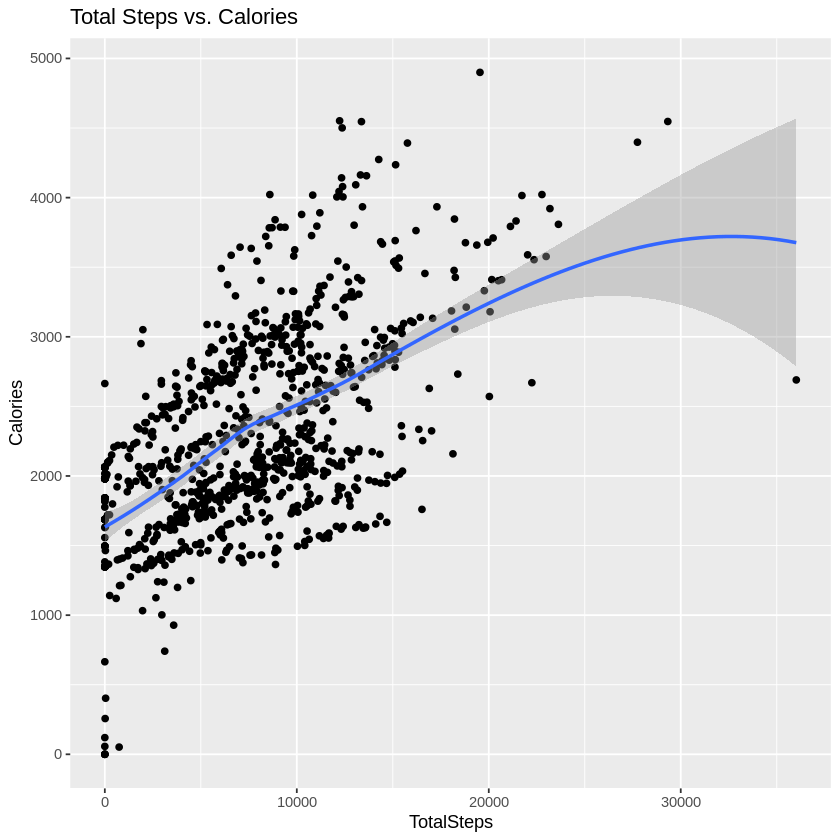

In [ ]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) +
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

###There is a clear positive correlation between Total Steps and Calories, which is expected since increased physical activity leads to a higher calorie expenditure.

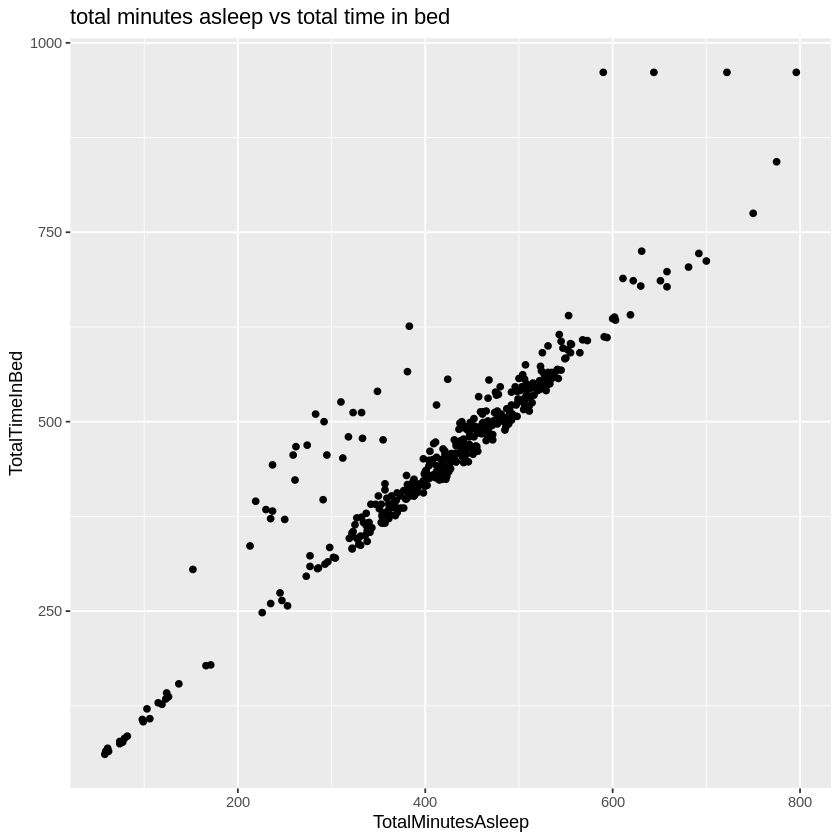

In [ ]:
ggplot(data=sleep,aes(x=TotalMinutesAsleep,y=TotalTimeInBed))+geom_point()+labs(title="total minutes asleep vs total time in bed")

###If Bellabeat users wish to enhance their sleep quality, it may be beneficial to utilize notifications that encourage them to go to bed. This recommendation is based on the observation that there seems to be a linear relationship between the Total Minutes Asleep and the Total Time in Bed. By receiving timely reminders or notifications, users may be prompted to prioritize and extend their time spent in bed, leading to potential improvements in their overall sleep patterns.

Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


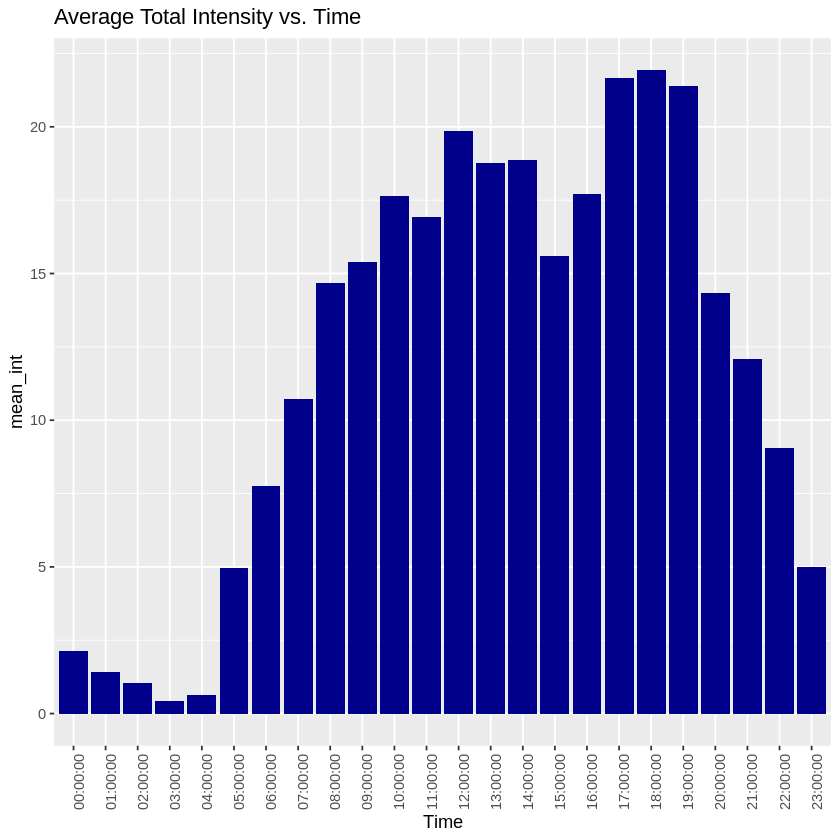

In [ ]:
mean_intensity = intensities %>%
  group_by(Time)%>%
  drop_na()%>%
  summarise(mean_int = mean(TotalIntensity))

ggplot(data=mean_intensity, aes(x=Time, y=mean_int)) + geom_histogram(stat = "identity", fill='darkblue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

###After analyzing the hourly Total Intensity data, it's evident that people exhibit higher activity levels between 5 am and 10 pm. The peak of activity occurs from 5 pm to 7 pm, suggesting that individuals are likely engaging in fitness activities, such as going to the gym or taking a walk after their work hours. This valuable insight allows us to leverage the Bellabeat app effectively by using this specific time frame to encourage and motivate users to partake in runs or walks, enhancing their fitness routines.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


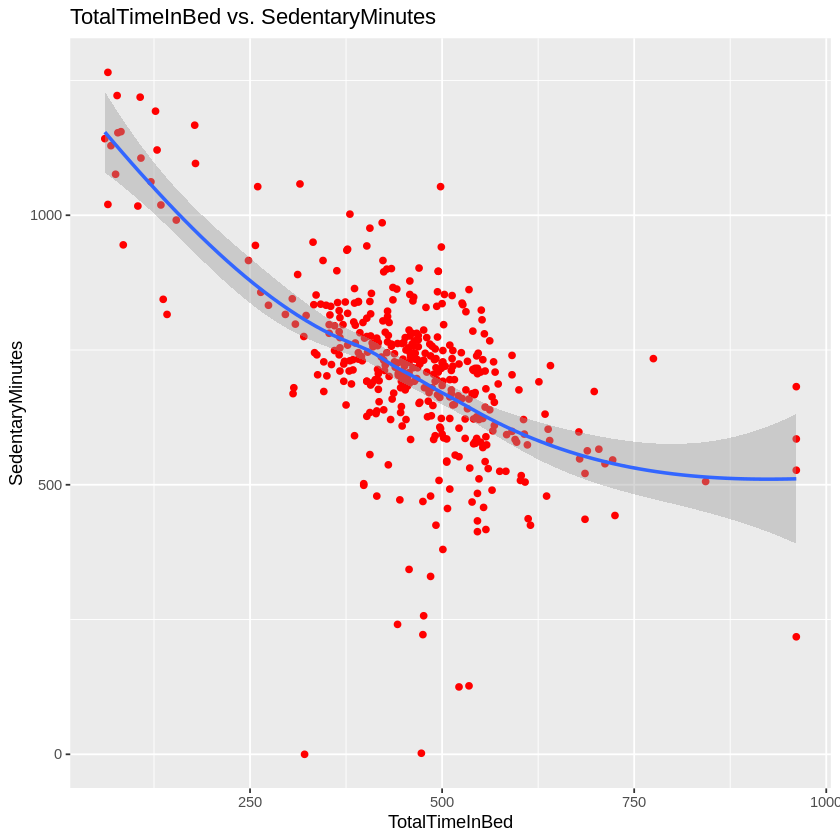

In [ ]:
ggplot(data=merged_Data, aes(x=TotalTimeInBed, y=SedentaryMinutes)) + geom_point(color='red') +geom_smooth()+
  labs(title="TotalTimeInBed vs. SedentaryMinutes")

###Certainly! The evident correlation displayed in the data indicates a negative association between Sedentary Minutes and Sleep Time.

###As a suggestion, for Bellabeat users aiming to enhance their sleep quality, the Bellabeat app could provide recommendations to minimize sedentary time.

##Important Insights

1.For users aiming to lose weight, managing daily calorie intake is crucial. Bellabeat can provide helpful recommendations for low-calorie lunch and dinner options to support their weight loss journey.

2 For those looking to enhance their sleep quality, Bellabeat can utilize app notifications to remind and encourage users to establish a consistent bedtime routine.

3 The peak activity period typically occurs between 5 pm and 7 pm, as people often engage in physical activities such as going to the gym or taking a walk after work. Bellabeat can take advantage of this timeframe to motivate users with timely reminders and encouragement to participate in a run or walk.